In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

# Importing Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [4]:
# Check top few records to get a feel of the data structure
mpg_df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [5]:
# droping the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [6]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [7]:
# Replacing the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [8]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america,1
394,44.0,4,97.0,52,2130,24.6,82,europe,1
395,32.0,4,135.0,84,2295,11.6,82,america,1
396,28.0,4,120.0,79,2625,18.6,82,america,1


In [9]:
# Convert categorical variable into dummy/indicator variables. 

mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [10]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [11]:
#analysing the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [13]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit())
temp[temp['hp'] == False] 


,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [14]:
mpg_df = mpg_df.replace('?', np.nan)

In [15]:
mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [18]:
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [19]:
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


In [20]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [21]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object / string type to float


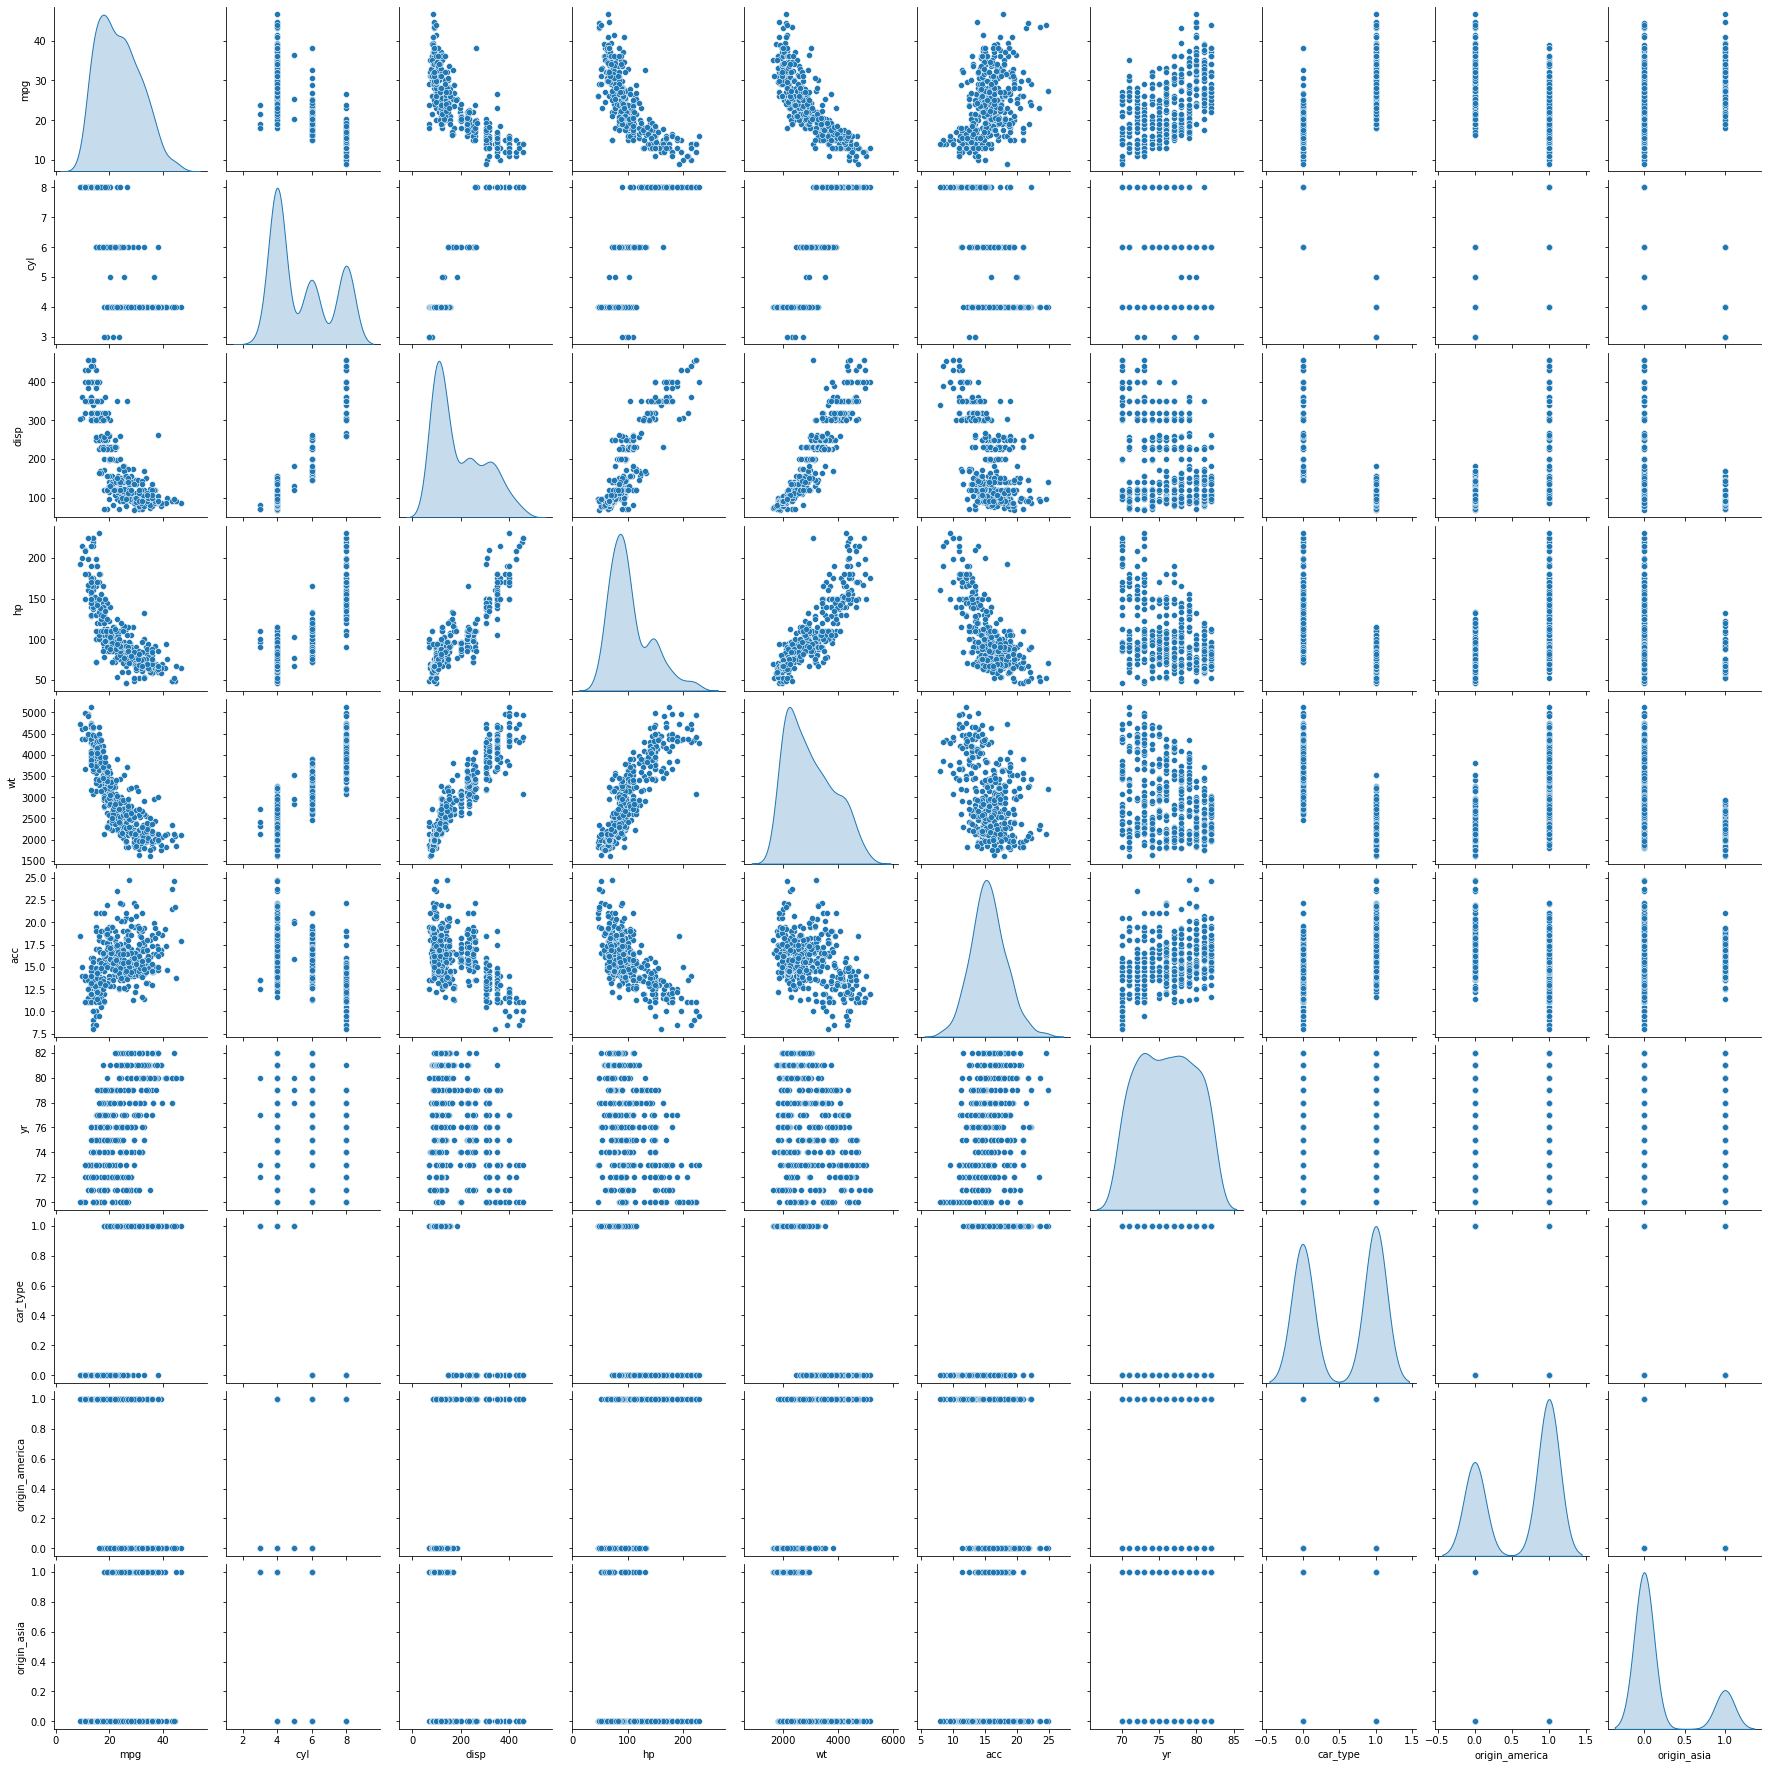

In [40]:
mpg_df_attr = mpg_df.iloc[:, 0:10]
sns.pairplot(mpg_df_attr, diag_kind='kde')  

In [ ]:
 #we can see as no. of cylinders increase mpg decrease(negative relationship)
 #displacement and mpg also has negative relation
 #when we look data individually(Diagonally) i.e. Univariate analysis, it's nowhere near normal distribution.
 #we have mixed up data from different gaussians
    

In [42]:
# Copying all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1

In [45]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [46]:
#exploring the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.4750732919168064
The coefficient for disp is 0.024349322002431447
The coefficient for hp is -0.046861910393252375
The coefficient for wt is -0.006564163296278442
The coefficient for acc is 0.041702279188101335
The coefficient for yr is 0.7938975478842025
The coefficient for car_type is 5.9665974398610295
The coefficient for origin_america is -1.4243481095472232
The coefficient for origin_asia is 0.6521119249598722
The coefficient for origin_europe is 0.7722361845873512


In [47]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -28.235395568497626


In [48]:
# we can write linear model as:
# Y=−21.11–0.35×X1+0.03×X2–0.02×X3–0.01×X4+0.12×X5+0.85×X6–1.90×X7+0.74×X8+1.16×X9

In [65]:
X_train.head()


,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
350,4,105.0,63.0,2215,14.9,81,1,1,0,0
59,4,97.0,54.0,2254,23.5,72,1,0,0,1
120,4,121.0,112.0,2868,15.5,73,1,0,0,1
12,8,400.0,150.0,3761,9.5,70,0,1,0,0
349,4,91.0,68.0,1985,16.0,81,1,0,1,0


In [68]:
y_pred = regression_model.predict(X_test)
y_pred

array([[19.36836069],
       [28.04221322],
       [21.28058851],
       [28.25228177],
       [22.66706144],
       [16.98417638],
       [30.27567408],
       [35.11587423],
       [18.82826764],
       [11.1715903 ],
       [30.750228  ],
       [18.58880774],
       [20.01930821],
       [26.79226483],
       [36.97957591],
       [23.5730702 ],
       [10.80286181],
       [18.63445195],
       [ 9.2364041 ],
       [33.56625534],
       [26.18103022],
       [32.11070389],
       [19.33587246],
       [25.51138421],
       [26.30415988],
       [30.64011801],
       [32.97920638],
       [33.44920355],
       [16.30457352],
       [30.43026526],
       [24.89516861],
       [10.25359643],
       [21.66783909],
       [28.80645769],
       [25.57158666],
       [14.04585215],
       [27.16344531],
       [ 8.58992792],
       [32.07649553],
       [24.87266292],
       [24.74640402],
       [25.1500793 ],
       [22.27436001],
       [34.01498479],
       [23.54663387],
       [20

In [31]:
# Model score - R2 or coeff of determinant

regression_model.score(X_test, y_test)

0.8513421387780064

In [32]:
# So the model explains 85% of the variability in Y using X

In [33]:
#  Iteration -2 

#Since on many dimensions, the relationship is not really linear, trying polynomial models (quadratic)

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)

print(y_pred)

print(poly_clf.score(X_test_, y_test)) #the accuracy score is 85.89 percent


[[21.68276618]
 [31.70564671]
 [16.95109566]
 [24.73370457]
 [22.59280887]
 [16.546517  ]
 [33.27247688]
 [37.84890756]
 [18.01465164]
 [13.32489187]
 [31.0254169 ]
 [18.93446603]
 [22.14822339]
 [25.11443754]
 [40.87612292]
 [22.69115148]
 [13.15689801]
 [19.14390121]
 [12.90945554]
 [34.85674785]
 [22.07671714]
 [30.8414664 ]
 [19.08470722]
 [27.19640464]
 [21.14923641]
 [30.20299323]
 [33.39913912]
 [35.22059724]
 [16.56272654]
 [31.31300448]
 [21.10019329]
 [14.24777783]
 [18.6011267 ]
 [25.96341215]
 [23.66249336]
 [13.5112035 ]
 [27.69374095]
 [12.84375684]
 [34.66566812]
 [22.93892698]
 [27.33545201]
 [23.1344364 ]
 [18.04330727]
 [33.65667841]
 [22.27994536]
 [21.94233699]
 [18.61020273]
 [14.04654656]
 [29.03265144]
 [19.20444128]
 [26.27345723]
 [25.58852917]
 [16.82565346]
 [14.0552008 ]
 [31.35053463]
 [24.4678673 ]
 [12.89869806]
 [13.89594816]
 [32.59990206]
 [39.73195653]
 [35.71854112]
 [39.46896097]
 [16.14687718]
 [22.81309535]
 [17.93328521]
 [33.22225134]
 [23.43414

In [35]:
print(X.shape)
print(X_train_.shape)
poly

(398, 10)
(278, 56)


PolynomialFeatures(interaction_only=True)